
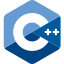
<br>

<div style="text-align:center; font-size:200%;">
 <b>Einführung in CMake</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 14 Einführung in CMake.ipynb -->
<!-- slides/module_600_build/topic_100_cmake_intro.cpp -->


# Was ist CMake?

- Meta-Build-System
  - Generiert Build-Systeme
- Test- und Installations-Unterstützung
- Plattformunabhängig
- Open Source


<img src="img/cmake-overview.png"
     style="display:block;margin:auto;width:50%"/>


<img src="img/cmake-workflow.png"
     style="display:block;margin:auto;width:90%"/>


## `CMakeLists.txt`

- Hauptdatei
- Beschreibt das Projekt
- Enthält Befehle für CMake
- Bestimmt das Quellverzeichnis


## Der CMake-Prozess

- Basierend auf der `CMakeLists.txt` wird ein Build-System generiert
- Das Build-System wird verwendet, um das Projekt zu kompilieren
- Typischerweise wird ein Verzeichnis für die Build-Artefakte erstellt
- Das Build-System wird in diesem Verzeichnis generiert
- Das Build-Verzeichnis sollte vom Quellverzeichnis getrennt sein
  ("out-of-source build")
- `CMakeCache.txt` im Build-Verzeichnis enthält Konfigurationsinformationen


## CMake Demo V0.1

```cmake
cmake_minimum_required(VERSION 3.27)
project(cmake_demo)

set(CMAKE_CXX_STANDARD 20)

add_executable(say_hello say_hello.cpp)
```


- `cmake_minimum_required(VERSION 3.27)` gibt die minimale CMake-Version an
- `project(cmake_demo)` legt den Projektnamen fest
- `set(CMAKE_CXX_STANDARD 20)` legt den C++-Standard fest
- `add_executable(say_hello say_hello.cpp)` fügt eine ausführbare Datei hinzu
  - `say_hello` ist der Name der ausführbaren Datei
  - `say_hello.cpp` ist die Quelldatei


### Übersetzen des Projekts

```bash
mkdir build
cd build
cmake ..
cmake --build .
```


- CMake Builds sollten in einem separaten Verzeichnis erfolgen
- `cmake ..` generiert das Build-System
- `cmake --build .` kompiliert das Projekt
- Damit können wir die gleichen Kommandos verwenden unabhängig, davon wie wir
  das Projekt kompilieren wollen


- Die `CMakeLists.txt`-Datei definiert, wie das Projekt kompiliert wird
- Die erste Zeile gibt an, welche CMake-Version erforderlich ist
- Bei Version 0.1 des Projekts haben wir Version 3.27 oder höher angegeben
- Das ist eine relativ neue Version, die möglicherweise nicht auf Ihrem
  System installiert ist
- CMake macht es einfach, die neueste Version lokal zu installieren, ohne das
  System zu beeinträchtigen
- Für das Beispiel ist in v0.2 die `CMakeLists.txt`-Datei so geändert, dass
  nur Version 3.21 benötigt wird


### Explizite Auswahl des Targets

- Ein CMake-Projekt kann mehrere Targets haben
- Ein Target kann eine ausführbare Datei, eine Bibliothek oder eine
  benutzerdefinierte Regel sein
- Mit `cmake --build . --target <target>` können wir ein spezifisches Target
  kompilieren

```bash
cmake --build . --target say_hello
```


### Multi-Config-Generatoren

- Generieren Projekte, die mehrere Konfigurationen unterstützen
- Zum Beispiel Debug und Release
- Visual Studio und Xcode sind Multi-Config-Generatoren
- Mit `cmake --build . --config Release` oder `Debug` kann eine Konfiguration
  ausgewählt werden


- Wie entscheidet CMake, welches Build-System generiert wird?
- Das wird vom ausgewählten Generator bestimmt
- Welche Generatoren verfügbar sind, hängt von der Plattform ab
- Wir können das mit `cmake --help` herausfinden
- Mit `cmake -G` können wir den Generator explizit angeben


### Übersetzen des Projekts mit Ninja

Falls Sie Ninja installiert haben und noch im `build`-Verzeichnis sind:

```bash
mkdir ../build-ninja
cd ../build-ninja
cmake -G "Ninja" ..
cmake --build .
```


### Kommandos in `CMakeLists.txt`

- `cmake_minimum_required(VERSION 3.21)` gibt die minimale CMake-Version an
- `project(cmake_demo)` legt den Projektnamen fest
   - mit `VERSION` kann eine Versionsnummer angegeben werden
   - mit `LANGUAGES` können die unterstützten Sprachen angegeben werden
- `set(CMAKE_CXX_STANDARD 20)` legt den C++-Standard fest
  - Das ist ein Beispiel für eine Variable, die gesetzt wird
- `add_executable(say_hello say_hello.cpp)` fügt eine ausführbare Datei hinzu


## Version 0.3: Mehrere Targets

- In dieser Version haben wir ein zweites Executable-Target hinzugefügt
- Jetzt können wir mit `cmake --build . --target <target>` zwischen den
  Targets wählen
- Defaultmäßig werden alle Targets kompiliert


## Version 0.4: `TodoList`-Klasse

- In dieser Version haben wir eine `TodoList`-Klasse hinzugefügt
- Wir haben sie direkt zur `todo_list` Executable hinzugefügt
- Das ist aus verschiedenen Gründen keine gute Idee
  - Wir können die Klasse nicht in anderen Targets verwenden
  - Die `CMakeLists.txt`-Datei wird unübersichtlich
  - Wir können die Klasse nicht testen


## Version 0.5: Bibliothek

- In dieser Version haben wir die `TodoList`-Klasse in eine Bibliothek
  ausgelagert
- Wir haben die Bibliothek zur `todo_list` Executable hinzugefügt
- Jetzt können wir die Bibliothek in anderen Targets verwenden
- Wir haben dabei darauf geachtet, dass wir die Bibliothek sowohl statisch
  als auch dynamisch linken können
- Das können wir testen, indem wir die `BUILD_SHARED_LIBS`-Variable beim
  Erzeugen des Build-Systems setzen


```bash
cmake -DBUILD_SHARED_LIBS=ON .. # oder OFF
cmake --build . --clean-first
```


Unter Windows kann man das folgende Kommando verwenden um die dynamisch
gelinkten Bibliotheken zu finden:

```powershell
dumpbin.exe /DEPENDENTS .\Debug\todo_list.exe
```

Unter Linux

```bash
ldd ./todo_list
```


## Version 0.6: Unterverzeichnisse

- In dieser Version haben wir die Quelldateien in Unterverzeichnisse
  verschoben
- Mit `add_subdirectory` können wir Unterverzeichnisse hinzufügen
- Mit `target_include_directories` können wir die Include-Pfade für ein Target
  festlegen